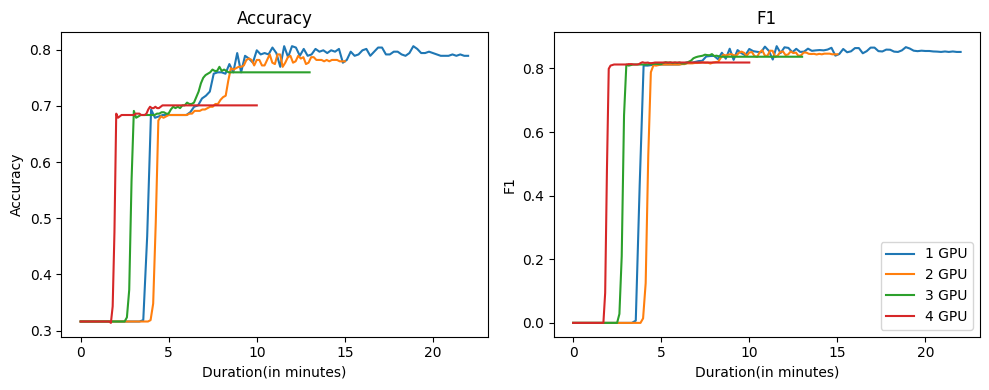

In [34]:
import matplotlib.pyplot as plt
import numpy as np
import re

accuracies = {}

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
durations = [22, 15, 13, 10]

# epoch 0: {'accuracy': 0.3161764705882353, 'f1': 0.0}
for i in range(1, 5):
    with open('log_{}gpu.out'.format(i), 'r') as f:
        data = f.readlines()


        x_axis = []
        y_axis_acc = []
        y_axis_f1 = []
        for d in data:
            res = re.findall(r"epoch (\d*): {'accuracy': (([0-9]*[.])?[0-9]+), 'f1': (([0-9]*[.])?[0-9]+)}", d )
            if res:
                epoch, accuracy, _, f1, _ = res[0]
                accuracies[i] = accuracies.get(i, []) + [(int(epoch), float(accuracy), float(f1))]

                x_axis.append(int(epoch))
                y_axis_acc.append(float(accuracy))
                y_axis_f1.append(float(f1))
        
        x_axis = np.linspace(0, durations[i-1], len(x_axis))
        axes[0].plot(x_axis, y_axis_acc, label='{} GPU'.format(i))
        axes[1].plot(x_axis, y_axis_f1, label='{} GPU'.format(i))

#print(accuracies[1][1])

axes[0].set_xlabel('Duration(in minutes)')
axes[0].set_ylabel('Accuracy')
axes[1].set_xlabel('Duration(in minutes)')
axes[1].set_ylabel('F1')

axes[0].set_title('Accuracy')
axes[1].set_title('F1')
fig.tight_layout()
plt.legend()
plt.show()